In [3]:
import numpy as np

def make_segment(angle, N, thickness=2.5, length=12.5, end_round=0.0):
    """
    Generate a centered, blocky line segment of given pixel thickness and length.

    angle      — direction in radians.
    N          — grid size (>= 13, guaranteed by user).
    thickness  — full width of the segment in pixels (≈2.5).
    length     — full length of the segment in pixels (≈12.5).
    end_round  — rounding of the caps (0 = squared ends).
    """

    # Convert full width/length to radius/half-length
    r = thickness / 2        # half-thickness
    L = length / 2           # half-length along the line

    # Generate centered grid
    c = (N - 1) / 2
    Y, X = np.mgrid[0:N, 0:N]
    X = X - c
    Y = Y - c

    # Orientation
    dx = np.cos(angle)
    dy = np.sin(angle)

    # Coordinates relative to line segment
    # t = distance along the direction of the line
    # d = perpendicular distance from line
    t = X * dx + Y * dy
    d = np.abs(-dy * X + dx * Y)

    # Rectangle body of the segment
    body = (np.abs(t) <= L) & (d <= r)

    # Optional rounded caps on the ends
    if end_round > 0:
        cap = (t**2) / (L**2) + (d**2) / ((r + end_round)**2)
        ends = (cap <= 1.0)
        mask = body | ends
    else:
        mask = body

    return mask.astype(np.uint8)


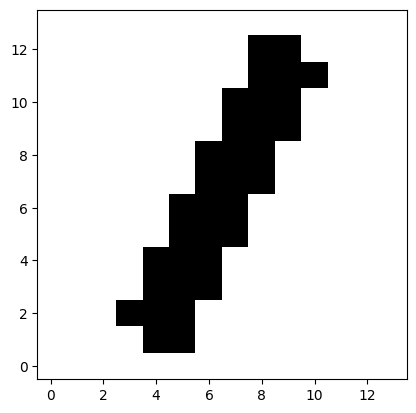

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [5]:
import matplotlib.pyplot as plt

N = 14
theta = 7 * (np.pi / 20)  # 30 degrees

I = make_segment(theta, N)

plt.imshow(I, cmap="binary", origin="lower")
plt.show()

print(I)